## XGBoost Classifier

In [1]:
import pandas as pd
df=pd.read_csv("D:\AML\XG-Boost-Algorithm-Implementation-in-Python-IRIS-Dataset--main\XG BOOST\dataset\Transformed Data Set - Sheet1.csv")
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df["Gender"])
df['Favorite Color'] = le.fit_transform(df["Favorite Color"])
df['Favorite Music Genre'] = le.fit_transform(df["Favorite Music Genre"])
df['Favorite Beverage'] = le.fit_transform(df["Favorite Beverage"])
df['Favorite Soft Drink'] = le.fit_transform(df["Favorite Soft Drink"])



In [10]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:4]
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(46, 4)
(20, 4)
(46,)
(20,)


In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### XGBoost

In [16]:
import xgboost
print(xgboost.__version__)

1.6.1


In [17]:
from xgboost import XGBClassifier

In [18]:
(XGBClassifier)

xgboost.sklearn.XGBClassifier

In [19]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [20]:
model=xgbt.fit(X_train, y_train)
model

[12:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimarors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimarors=10,
              n_estimators=100, n_jobs=0, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [21]:
xgbt_pred = xgbt.predict(X_test)
xgbt_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
xgbt.score(X_train, y_train)

0.9782608695652174

In [24]:
xgbt.score(X_test, y_test)

0.45

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

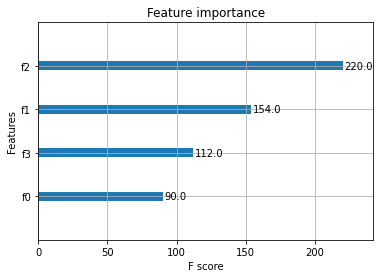

In [26]:
plot_importance(xgbt)